In [130]:
import PyROA
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import os
import glob
import scienceplots
import sys
sys.path.insert(0, os.path.abspath('../..'))
import utils
np.random.seed(2) 
torch.manual_seed(2)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
%autoreload

In [100]:
lcs = utils.get_data('../../datasets/ZTF_rm_segments/3C273', start_col=0,sep=' ', norm=False, shuffle=False, keep_missing=True)

found 13 for band='r'
found 2 for band='i'
found 7 for band='g'
max time:  59889.55
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(12, 3, 245, 3)
train size: 10, valid size: 2, test size: 2


In [101]:
lcs.valid_files_df

,r,i,g
3C273--3,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,../../datasets/ZTF_rm_segments/3C273/g/3C273--...
3C273--2,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,../../datasets/ZTF_rm_segments/3C273/g/3C273--...
3C273--5,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,../../datasets/ZTF_rm_segments/3C273/g/3C273--...
3C273--10,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,NaN
3C273--11,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,NaN
3C273--4,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,../../datasets/ZTF_rm_segments/3C273/g/3C273--...
3C273--8,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,NaN
3C273--12,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,NaN
3C273--7,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,NaN
3C273--6,../../datasets/ZTF_rm_segments/3C273/r/3C273--...,NaN,../../datasets/ZTF_rm_segments/3C273/g/3C273--...


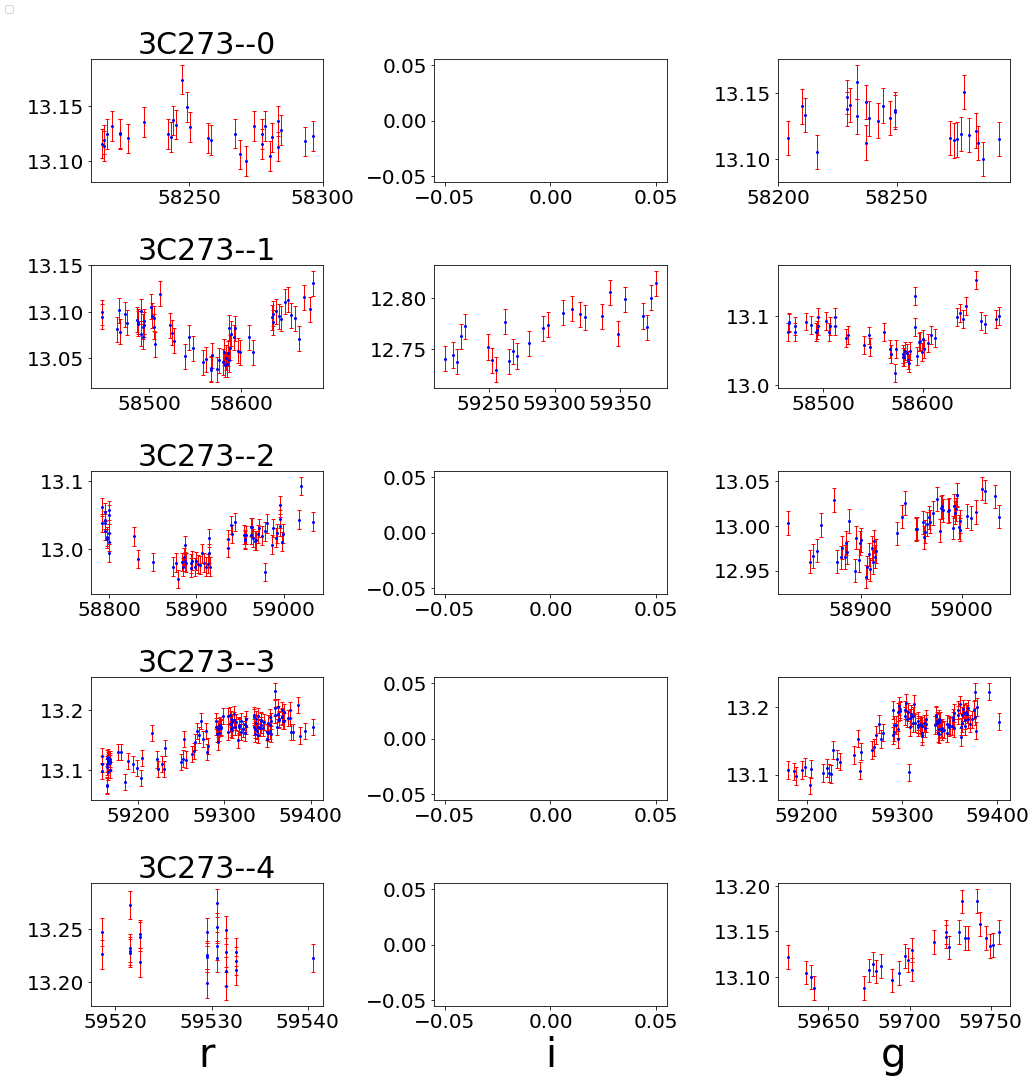

In [104]:
utils.preview_lcs(lcs, indexes=[-1, -2, 1,0,5], figsize=(15,15), fs=30)

In [121]:
epoch_dirs = glob.glob('../../datasets/ZTF_rm_segments/3C273/*/')
epoch_dirs.sort()
print(epoch_dirs, len(epoch_dirs))

filters = ["g","r"] 
objName = "3C273"
psi_types = ["LogGaussian","LogGaussian", "LogGaussian"]

            # rms      # mean       # lag        # width of window  # extra error 
priors = [[0.0, 20.0], [0.0, 20.0], [-50.0, 50.0], [0.01, 10.0], [0.0, 10.0]]
#priors = [[0.0, 50.0],[0.0, 1000.0], [-50.0, 50.0], [0.01, 10.0], [0.0, 50.0]]

# epoch 1
fit = PyROA.Fit(epoch_dirs[0], objName, filters, priors, delay_dist=True, add_var=True, psi_types=psi_types)
PyROA.Plot(fit)

['../../datasets/ZTF_rm_segments/3C273/epoch0/', '../../datasets/ZTF_rm_segments/3C273/epoch1/', '../../datasets/ZTF_rm_segments/3C273/epoch2/', '../../datasets/ZTF_rm_segments/3C273/epoch3/', '../../datasets/ZTF_rm_segments/3C273/epoch4/', '../../datasets/ZTF_rm_segments/3C273/epoch5/', '../../datasets/ZTF_rm_segments/3C273/epoch6/'] 7
Initial Parameter Values
       A0       B0    σ0         A1       B1    τ1    Δ1    σ1    Δ
---------  -------  ----  ---------  -------  ----  ----  ----  ---
0.0142286  13.1275  0.01  0.0130825  13.1246     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:04<00:00, 155.80it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    7.18445  (+   4.13002 -   6.87023)


Best Fit Parameters
        A0       B0          σ0          A1       B1       τ1       Δ1         σ1       Δ
----------  -------  ----------  ----------  -------  -------  -------  ---------  ------
0.00824722  13.1273  0.00268887  0.00570067  13.1246  7.18445  11.5396  0.0025779  9.2797


OSError: 'science' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

# Segment 0

Initial Parameter Values
       A0       B0    σ0         A1       B1    τ1    Δ1    σ1    Δ
---------  -------  ----  ---------  -------  ----  ----  ----  ---
0.0142286  13.1275  0.01  0.0130825  13.1246     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:06<00:00, 149.73it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    7.18445  (+   4.13002 -   6.87023)


Best Fit Parameters
        A0       B0          σ0          A1       B1       τ1       Δ1         σ1       Δ
----------  -------  ----------  ----------  -------  -------  -------  ---------  ------
0.00824722  13.1273  0.00268887  0.00570067  13.1246  7.18445  11.5396  0.0025779  9.2797


/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/PyROA/PyROA.py:83: RuntimeWarning: underflow encountered in exp
  psi[t_shift>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)
/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/PyROA/PyROA.py:83: RuntimeWarning: underflow encountered in multiply
  psi[t_shift>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)


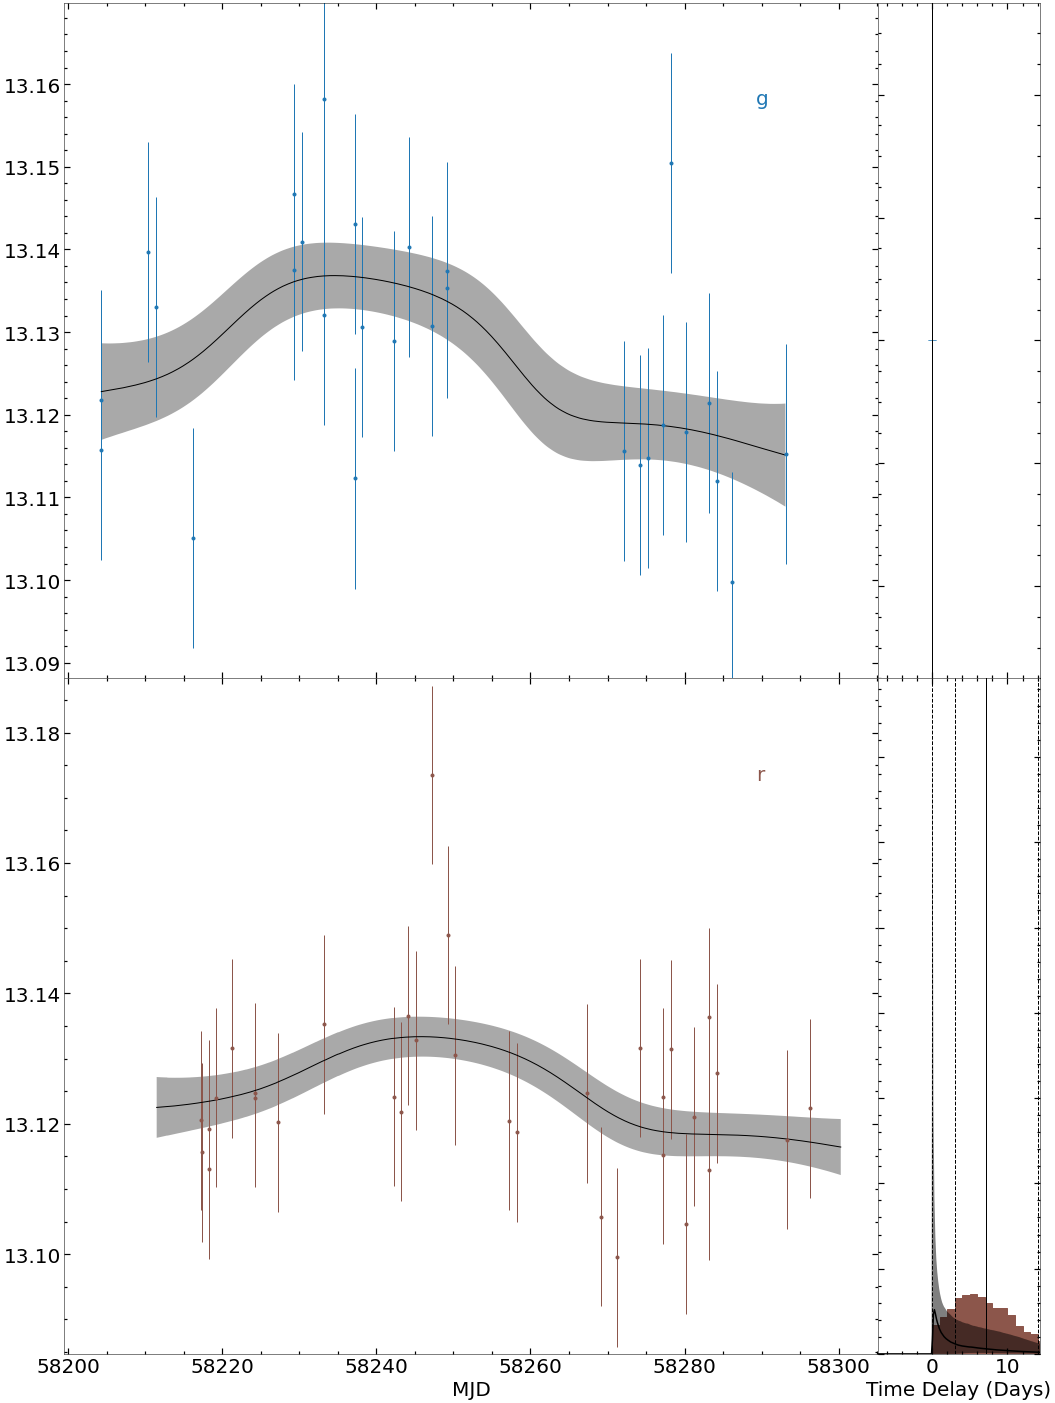

Initial Parameter Values
      A0      B0    σ0        A1       B1    τ1    Δ1    σ1    Δ
--------  ------  ----  --------  -------  ----  ----  ----  ---
0.025431  13.074  0.01  0.022404  13.0779     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:42<00:00, 97.81it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    0.75838  (+   0.56346 -   1.18392)


Best Fit Parameters
       A0       B0          σ0        A1       B1        τ1       Δ1         σ1       Δ
---------  -------  ----------  --------  -------  --------  -------  ---------  ------
0.0212533  13.0728  0.00204024  0.019296  13.0779  0.758382  3.30535  0.0014835  9.7499


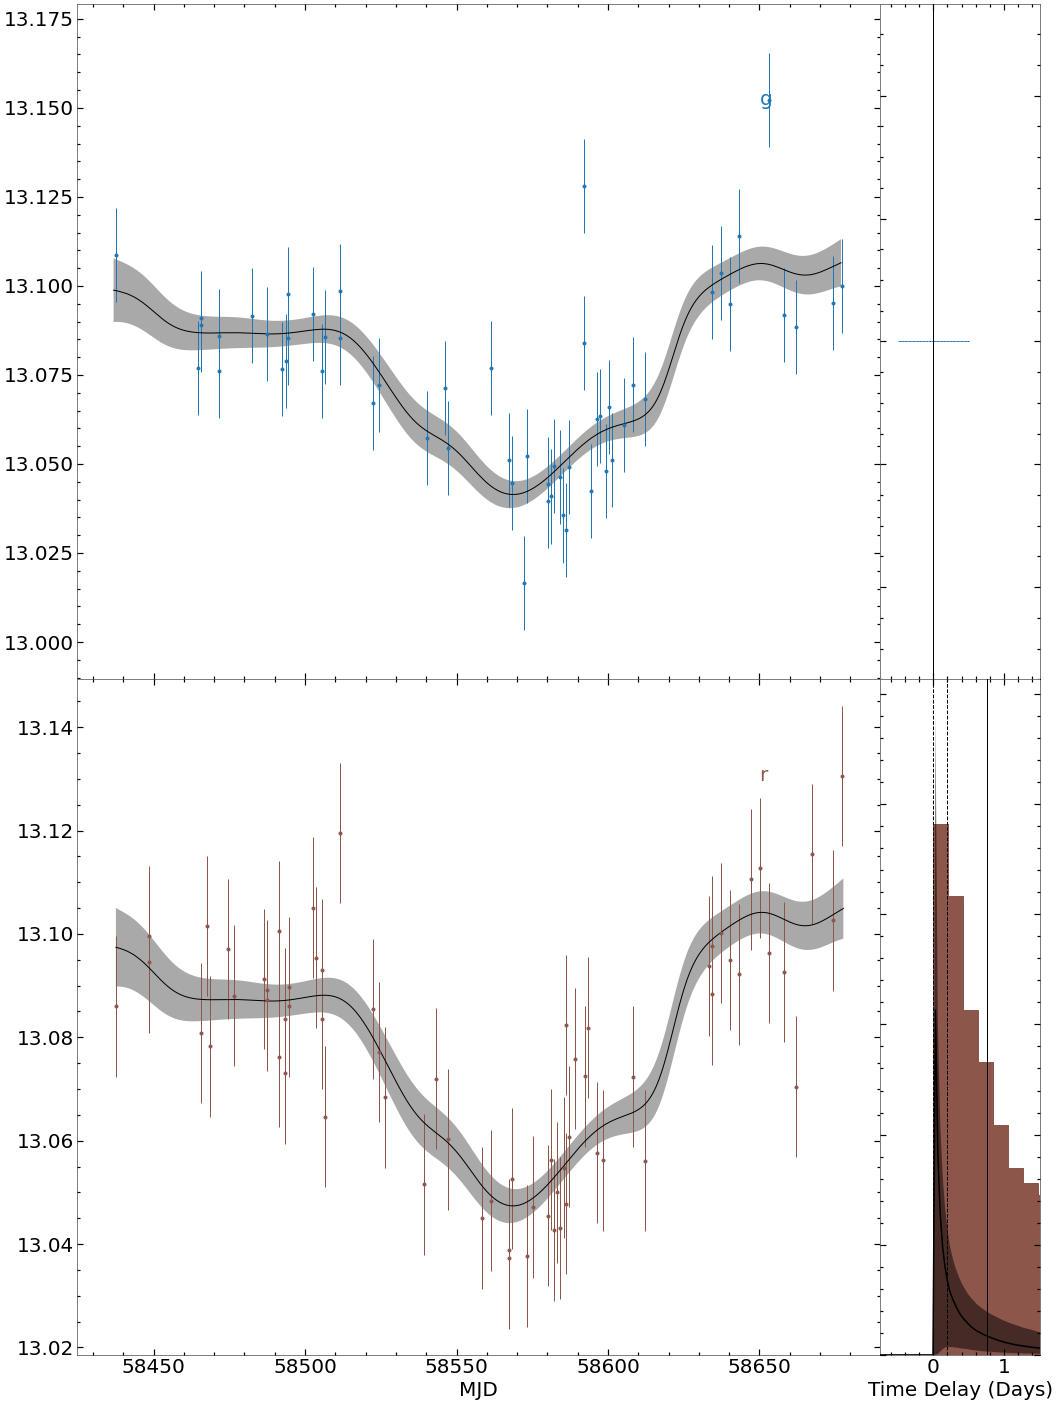

Initial Parameter Values
       A0       B0    σ0         A1       B1    τ1    Δ1    σ1    Δ
---------  -------  ----  ---------  -------  ----  ----  ----  ---
0.0254718  12.9949  0.01  0.0281317  13.0116     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:05<00:00, 79.44it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    2.83899  (+   1.62717 -   1.77090)


Best Fit Parameters
       A0       B0          σ0        A1       B1       τ1       Δ1         σ1        Δ
---------  -------  ----------  --------  -------  -------  -------  ---------  -------
0.0224043  12.9952  0.00332389  0.021798  13.0115  2.83899  158.619  0.0096861  9.73799


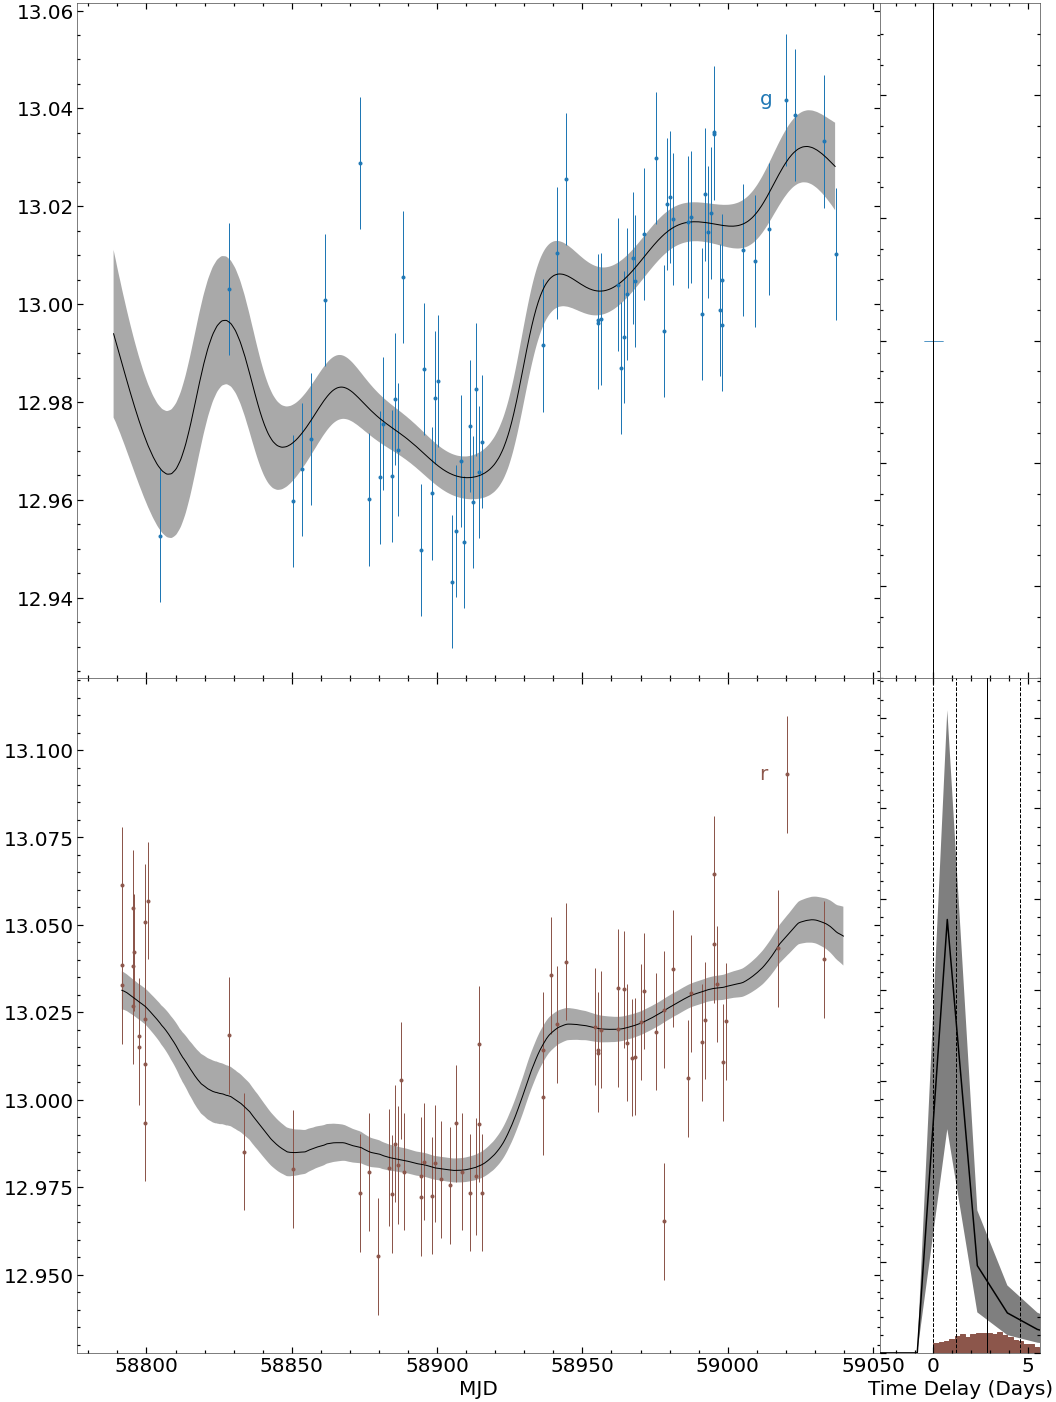

Initial Parameter Values
       A0       B0    σ0         A1       B1    τ1    Δ1    σ1    Δ
---------  -------  ----  ---------  -------  ----  ----  ----  ---
0.0297661  13.1667  0.01  0.0326525  13.1573     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:15<00:00, 51.23it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    1.06382  (+   0.74847 -   1.37505)


Best Fit Parameters
       A0       B0          σ0         A1       B1       τ1       Δ1          σ1        Δ
---------  -------  ----------  ---------  -------  -------  -------  ----------  -------
0.0267352  13.1671  0.00189579  0.0289529  13.1576  1.06382  3.23766  0.00437483  9.78585


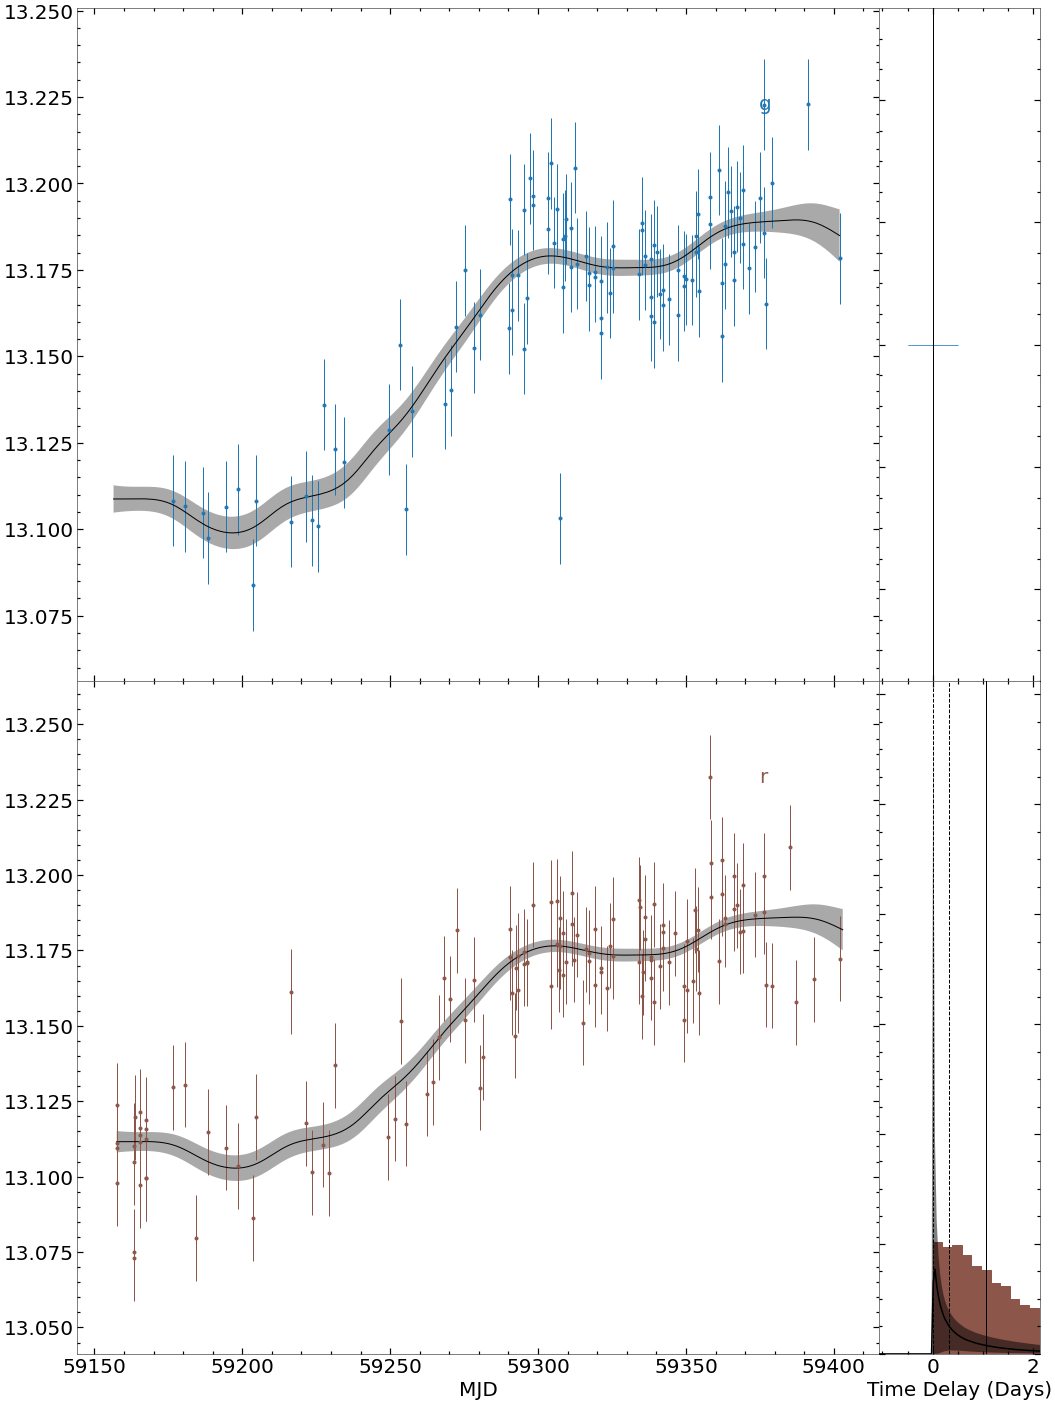

In [139]:

fit = PyROA.Fit(epoch_dirs[0], objName, filters, priors, delay_dist=True, add_var=True, psi_types=psi_types)
PyROA.Plot(fit)



# Segment 1

In [ ]:

fit = PyROA.Fit(epoch_dirs[1], objName, filters, priors, delay_dist=True, add_var=True, psi_types=psi_types)
PyROA.Plot(fit)



# Segment 2

In [ ]:

fit = PyROA.Fit(epoch_dirs[2], objName, filters, priors, delay_dist=True, add_var=True, psi_types=psi_types)
PyROA.Plot(fit)



# Segment 3

In [ ]:

fit = PyROA.Fit(epoch_dirs[3], objName, filters, priors, delay_dist=True, add_var=True, psi_types=psi_types)
PyROA.Plot(fit)



In [ ]:
# fixing ROA 

# install corner, install scienceplots, and add import for it in PyROA.py
# rm size=15.0  (or fontsize), on line 1899 of PyROA.py 

In [ ]:
# how did james use pyroa? 
